# Classification

## Classification using Linear Regression


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from scipy.special import softmax
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
x1 = np.random.normal(5,1,10)
x1 = np.append(np.random.normal(5, 1, 9), 20) #
x2 = np.random.normal(2,1,10)
x = np.append(x1,x2)
labels = [0.]*len(x1) + [1.]*len(x2)

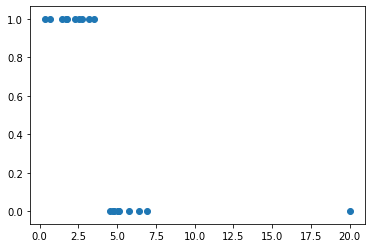

In [3]:
plt.scatter(x,labels)

In [4]:
learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder("float")
Y = tf.placeholder("float")
w = tf.Variable([0.,0.],name="parameter",dtype=tf.float32)

def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)),
                  tf.multiply(w[0], tf.pow(X, 0)))

y_pred = model(X,w)
cost = tf.reduce_sum(tf.square(Y-y_pred))

trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
correct_predictions = tf.equal(Y,tf.cast(tf.greater(y_pred,0.5),dtype=tf.float32))
accuracy = tf.reduce_mean(tf.cast(correct_predictions,dtype=tf.float32))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #costs= []
    for epoch in range(training_epochs):
        sess.run(trainer, feed_dict={X:x,Y:labels})
        curr_cost = sess.run(cost, feed_dict={X:x,Y:labels})
        if epoch % 100 == 0:
            print(epoch, " ",curr_cost)
    w_val = sess.run(w)
    print('Learned parameter : ', w_val)
    #print("Correct predictions : ",sess.run(correct_predictions,feed_dict={X:x,Y:labels}))
    #print("Accuracy :", sess.run(accuracy,feed_dict={X:x,Y:labels}))
    #print(sess.run(tf.greater(y_pred,0.5),feed_dict={X:x,Y:labels}))
    sess.close()
        

0   9.2865925
100   3.3678818
200   3.206492
300   3.201991
400   3.201866
500   3.2018623
600   3.2018623
700   3.2018623
800   3.2018623
900   3.2018623
Learned parameter :  [ 0.8312551  -0.07459434]


In [6]:
y_model=w_val[0]+w_val[1]*x

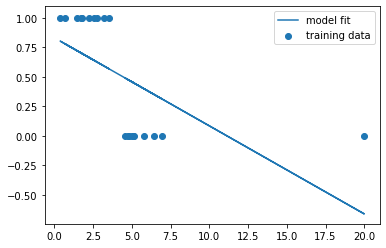

In [7]:
plt.scatter(x,labels,label="training data")
plt.plot(x,y_model, label="model fit")
plt.legend()
plt.show()

## What if there are outliers?

In [8]:
x1 = np.append(np.random.normal(5, 1, 9), 20) #outlier added
x2 = np.random.normal(2,1,10)
x = np.append(x1,x2)
labels = [0.]*len(x1) + [1.]*len(x2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        sess.run(trainer, feed_dict={X:x,Y:labels})
        curr_cost = sess.run(cost, feed_dict={X:x,Y:labels})
        if epoch % 100 == 0:
            print(epoch, " ",curr_cost)
    w_val = sess.run(w)
    print('Learned parameter : ', w_val)
    sess.close()

0   9.171044
100   3.6664505
200   3.5342937
300   3.5310702
400   3.5309916
500   3.5309896
600   3.5309896
700   3.53099
800   3.53099
900   3.53099
Learned parameter :  [ 0.78929555 -0.06882054]


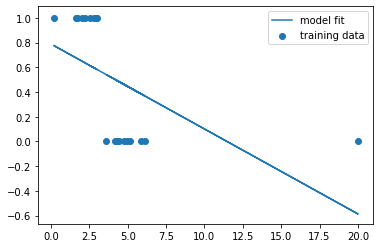

In [9]:
y_model=w_val[0]+w_val[1]*x
plt.scatter(x,labels,label="training data")
plt.plot(x,y_model, label="model fit")
plt.legend()
plt.show()

## Logistic Regression (Classification :P)

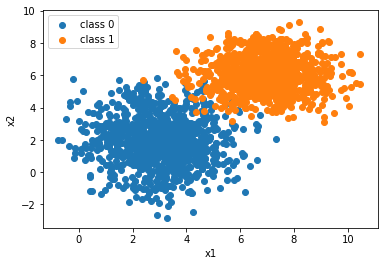

In [10]:
# Gernerate fake 2D data 
x1_l1=np.random.normal(3,1.3,[1000,1])
x1_l2=np.random.normal(7,1.2,[1000,1])
x2_l1=np.random.normal(2,1.5,[1000,1])
x2_l2=np.random.normal(6,1.1,[1000,1])
x1=np.append(x1_l1,x1_l2,axis=0)
x2=np.append(x2_l1,x2_l2,axis=0)
x=np.append(x1,x2,axis=1)
y=np.array([[0.]*len(x1_l1)+[1.]*len(x2_l2)]).T

plt.scatter(x1_l1,x2_l1,label='class 0')
plt.scatter(x1_l2,x2_l2,label='class 1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [11]:
learning_rate = 0.0001
training_epochs = 3000

def sigmoid(x):
    return 1/(1+np.exp(-x))

(m,n) = x.shape

In [12]:
# define placeholders and variables
X = tf.placeholder(tf.float32, [None, n])
Y = tf.placeholder(tf.float32,[None,1])
b = tf.Variable(0.0, name='bias', dtype=tf.float32,trainable=True)
w = tf.Variable(np.zeros([n,1]), name='weights', dtype=tf.float32, trainable=True)

In [13]:
# model
y_model = tf.sigmoid(tf.matmul(X,w)+b)
#y_model = tf.sigmoid(X@w+b)
#y_model = tf.sigmoid(X[:,0]*w[0,0]+X[:,1]*w[1,0]+b)

In [14]:
# cost
cost = -tf.reduce_sum(Y*tf.log(y_model)+(1-Y)*tf.log(1-y_model))

In [15]:
# trainer
trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
correct_predictions = tf.equal(Y,tf.cast(tf.greater(y_model,0.5),dtype=tf.float32))
accuracy = tf.reduce_mean(tf.cast(correct_predictions,dtype=tf.float32))

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_cost = 0
    for epoch in range(training_epochs):
        curr_cost,_ = sess.run([cost,trainer], feed_dict={X:x,Y:y})
        if epoch % 100 == 0:
            print(epoch, " ",curr_cost)
        if abs(prev_cost-curr_cost)<0.001:
            break
        prev_cost = curr_cost
    w_val = sess.run(w)
    b_val = sess.run(b)
    print('Learned weights : ', w_val)
    print('Learned bias : ', b_val)
    print("Correct predictions : ",sess.run(correct_predictions,feed_dict={X:x,Y:y}))
    print("Accuracy :", sess.run(accuracy,feed_dict={X:x,Y:y}))
    print(sess.run(tf.greater(y_model,0.5),feed_dict={X:x,Y:y}))
    sess.close()

0   1386.2919
100   569.1243
200   393.70523
300   312.3493
400   265.1778
500   234.15054
600   212.0489
700   195.42186
800   182.40732
900   171.90941
1000   163.23984
1100   155.94345
1200   149.70627
1300   144.30525
1400   139.57626
1500   135.39645
1600   131.67174
1700   128.3284
1800   125.308624
1900   122.565636
2000   120.06148
2100   117.76485
2200   115.650024
2300   113.69532
2400   111.882416
2500   110.1957
2600   108.62201
2700   107.14982
2800   105.76924
2900   104.47156
Learned weights :  [[1.0944899]
 [1.3412058]]
Learned bias :  -10.907446
Correct predictions :  [[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]
Accuracy : 0.9855
[[False]
 [False]
 [False]
 ...
 [ True]
 [ True]
 [ True]]


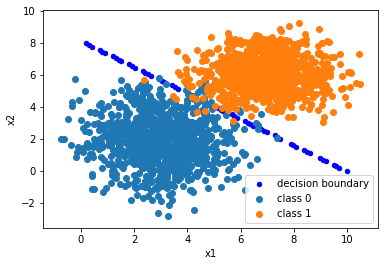

In [17]:
x1_boundary, x2_boundary = [], []
for x1_test in np.linspace(0, 10, 100):
    for x2_test in np.linspace(0, 10, 100):
        z = sigmoid(-x2_test*w_val[1] - x1_test*w_val[0] - b_val)
        if abs(z - 0.5) < 0.01:
            x1_boundary.append(x1_test)
            x2_boundary.append(x2_test)
plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20, label = 'decision boundary')
plt.scatter(x1_l1,x2_l1,label='class 0')
plt.scatter(x1_l2,x2_l2,label='class 1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Multiclass classification

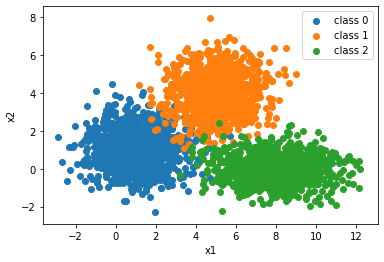

In [18]:
# Gernerate fake 2D data 
# (1,1) (5,4) (8,0)
x1_l1=np.random.normal(1,1.3,[1000,1])
x1_l2=np.random.normal(5,1.2,[1000,1])
x1_l3=np.random.normal(8,1.5,[1000,1])
x2_l1=np.random.normal(1,1.0,[1000,1])
x2_l2=np.random.normal(4,1.1,[1000,1])
x2_l3=np.random.normal(0,0.7,[1000,1])

x1=np.concatenate((x1_l1,x1_l2,x1_l3),axis=0)
x2=np.concatenate((x2_l1,x2_l2,x2_l3),axis=0)
x=np.concatenate((x1,x2),axis=1)
y=np.matrix([[1,0.,0.]]*len(x1_l1)+[[0.,1.,0.]]*len(x2_l2)+[[0.,0.,1.]]*len(x2_l3))

# preview data
plt.scatter(x1_l1,x2_l1,label='class 0')
plt.scatter(x1_l2,x2_l2,label='class 1')
plt.scatter(x1_l3,x2_l3,label='class 2')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [19]:
# divide to training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7)
(train_size,n_features)=x_train.shape

In [20]:
# hyperparameters
learning_rate = 0.001
training_epochs = 500
num_classes = 3
batch_size = 100

# define placeholders, variables
X = tf.placeholder(tf.float32, [None,n_features])
Y = tf.placeholder(tf.float32, [None,num_classes])
w = tf.Variable(tf.zeros([n_features,num_classes]),dtype=tf.float32, name='weights')
b = tf.Variable(tf.zeros([1,num_classes]),dtype=tf.float32, name='bias')

# softmax model
y_model = tf.nn.softmax(X@w + b)

# cost and train op
cost = tf.reduce_sum(-Y*tf.log(y_model))
trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# performance params
correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [21]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(training_epochs * train_size // batch_size ):
        datum = (epoch*batch_size) % train_size
        x_batch = x_train[datum: datum+batch_size,:]
        y_batch = y_train[datum: datum+batch_size,:]
        curr_cost, _ = sess.run([cost, trainer], feed_dict={X:x_batch, Y:y_batch})
        if epoch % 100 == 0:
            print(epoch, ": ", curr_cost)
    print("Accuracy : ", sess.run(accuracy, feed_dict={X:x_test,Y:y_test}))
    w_val = sess.run(w)
    b_val = sess.run(b)

0 :  109.8612
100 :  25.906597
200 :  17.746986
300 :  16.689358
400 :  9.475227
500 :  14.027833
600 :  10.084276
700 :  8.604215
800 :  9.348821
900 :  6.77246
1000 :  8.540865
1100 :  9.547339
1200 :  9.7076
1300 :  11.014923
1400 :  11.868004
1500 :  6.7820373
1600 :  7.237328
1700 :  10.84811
1800 :  3.4359388
1900 :  4.728985
2000 :  5.809016
2100 :  7.2688923
2200 :  10.706437
2300 :  4.2883825
2400 :  8.241406
2500 :  3.7369819
2600 :  7.0122595
2700 :  6.501833
2800 :  5.097021
2900 :  6.247338
3000 :  4.7932405
3100 :  7.0842433
3200 :  7.0954943
3300 :  7.332286
3400 :  8.698153
3500 :  9.938807
3600 :  4.948932
3700 :  5.5669675
3800 :  9.549112
3900 :  2.4379196
4000 :  3.2828197
4100 :  4.439248
4200 :  6.0942907
4300 :  10.23217
4400 :  3.3731525
4500 :  7.5244255
4600 :  2.964875
4700 :  5.6694994
4800 :  5.9482603
4900 :  4.369788
5000 :  5.713649
5100 :  4.4655504
5200 :  7.090393
5300 :  6.5276394
5400 :  6.629337
5500 :  8.042604
5600 :  9.422998
5700 :  4.298312
58

[[4.60764655e-05 3.32922134e-17 3.14283700e-13]
 [4.24982507e-05 3.38501326e-17 3.35129267e-13]
 [3.91979135e-05 3.44174016e-17 3.57357464e-13]
 ...
 [2.22772318e-19 1.22061863e-03 1.77304926e-12]
 [2.05472223e-19 1.24107406e-03 1.89065071e-12]
 [1.89515623e-19 1.26187229e-03 2.01605234e-12]]
[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


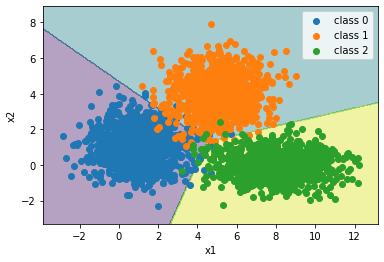

In [22]:
# obtain decision boundary
resolution = 0.05
x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),np.arange(x2_min, x2_max,resolution))
xx = np.append(xx1.flatten()[:,np.newaxis],xx2.flatten()[:,np.newaxis],axis=1)
yy = softmax(xx@w_val+b_val)
print(yy)
yy = np.argmax(yy,axis=1).reshape(xx1.shape)
print(yy)
# plot decision boundary
plt.contourf(xx1, xx2, yy, alpha=0.4)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.scatter(x1_l1,x2_l1,label='class 0')
plt.scatter(x1_l2,x2_l2,label='class 1')
plt.scatter(x1_l3,x2_l3,label='class 2')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# MNIST dataset

In [23]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [24]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [25]:
y = y.astype(float)
y

array([5., 0., 4., ..., 4., 5., 6.])

In [26]:
y_,idx=np.unique(y,return_index=True)
y_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

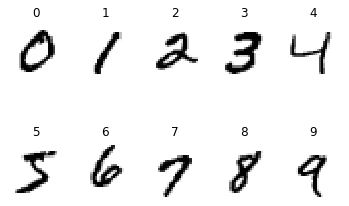

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=5)

count=0
for row in ax:
    for col in row:
        col.imshow(X[idx[count]].reshape(28,28),cmap = mpl.cm.gray_r)
        col.axis('off')
        col.set_title(count)
        count+=1

In [28]:
x_train, x_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

## A Binary classifier

In [29]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [30]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)
y_pred_5 = sgd_clf.predict(x_test)
print("Prediction accuracy: ", metrics.accuracy_score(y_test_5,y_pred_5))

Prediction accuracy:  0.9492


A K-fold cross validation:

In [31]:
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

But is the random random? Try using StratifiedKfold:

In [32]:
skfolds = StratifiedKFold(n_splits = 3,random_state=42)

fold = 0
for train_idx, test_idx in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)
    x_train_fold = x_train[train_idx]
    y_train_fold = y_train_5[train_idx]
    x_test_fold = x_train[test_idx]
    y_test_fold = y_train_5[test_idx]
    clone_clf.fit(x_train_fold, y_train_fold)
    y_pred_fold = clone_clf.predict(x_test_fold)
    print("Accuracy of fold {} : {}\n" .format(fold+1, metrics.accuracy_score(y_test_fold, y_pred_fold)))
    fold+=1
    

Accuracy of fold 1 : 0.95035

Accuracy of fold 2 : 0.96035

Accuracy of fold 3 : 0.9604



So it uses StratifiedKfold !

In [33]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [34]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

The target 5 is low (about 10% ). Accuracy is not a good measure. Confusion matrix -

In [35]:
y_train_pred = model_selection.cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [36]:
metrics.confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [37]:
metrics.precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [38]:
metrics.recall_score(y_train_5, y_train_pred)

0.6511713705958311

When it claims an image represents a 5, it is correct only 83.7% of the time.
It only detects 65.12% of the 5s.

Harmonics mean of these two - F1 score

In [39]:
metrics.f1_score(y_train_5, y_train_pred)

0.7325171197343846

This favors models with similar precision and recall.

### Precision/Recall trade off

In [40]:
y_scores = sgd_clf.decision_function(X[0].reshape(1,-1))
y_scores

array([2164.22030239])

In [41]:
threshold = 0 # default
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [42]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Raising threshold increases recall !

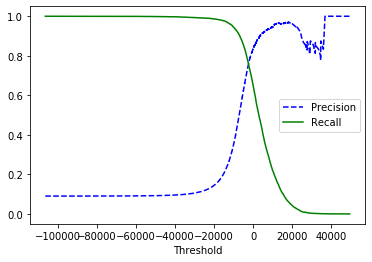

In [43]:
y_scores = model_selection.cross_val_predict(sgd_clf, x_train, y_train_5, cv=3,method="decision_function")
precisions, recalls, thresholds = metrics.precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
   # highlight the threshold, add the legend, axis label and grid

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.legend()
plt.xlabel('Threshold')
plt.show()

No handles with labels found to put in legend.


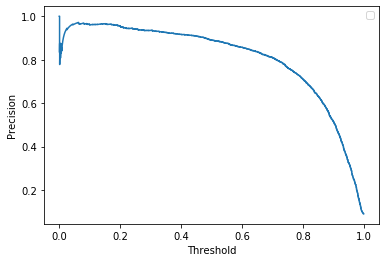

In [44]:
plt.plot(recalls,precisions)
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

In [45]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [46]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
print(metrics.precision_score(y_train_5, y_train_pred_90))
print(metrics.recall_score(y_train_5, y_train_pred_90))

0.9000345901072293
0.4799852425751706


High Precision is not always good !

In [47]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_5, y_scores)

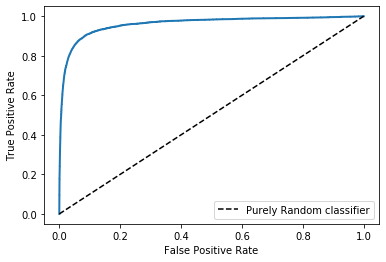

In [48]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--', label='Purely Random classifier') # dashed diagonal
    # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [49]:
metrics.roc_auc_score(y_train_5, y_scores)

0.9604938554008616

G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


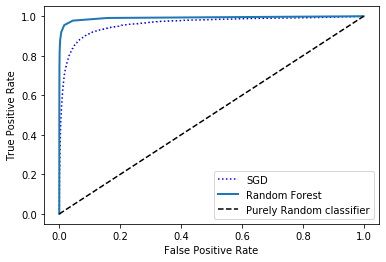

In [50]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = model_selection.cross_val_predict(forest_clf, x_train, y_train_5, cv=3,method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = metrics.roc_curve(y_train_5,y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [51]:
metrics.roc_auc_score(y_train_5, y_scores_forest)

0.9920527492698306

In [52]:
print(metrics.precision_score(y_train_5,np.argmax(y_probas_forest, axis=1)))
print(metrics.recall_score(y_train_5, np.argmax(y_probas_forest, axis=1)))

0.986046511627907
0.8212506917542889


## Multiclass classification


Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass
classification task, and it automatically runs OvA

In [53]:
sgd_clf.fit(x_train, y_train) # y_train, not y_train_5
sgd_clf.predict(x_train[0].reshape(1,-1))

array([3.])

In [54]:
some_digit_scores = sgd_clf.decision_function(x_train[0].reshape(1,-1))
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [55]:
np.argmax(some_digit_scores)

3

In [56]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Alternatively, to run OvO instead of OvA:

In [57]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_train, y_train)
ovo_clf.predict(x_train[0].reshape(1,-1))
len(ovo_clf.estimators_)

45

In [58]:
forest_clf.fit(x_train, y_train)
forest_clf.predict(x_train[0].reshape(1,-1))

G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5.])

In [59]:
forest_clf.predict_proba(x_train[0].reshape(1,-1))

array([[0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [60]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.87082583, 0.87089354, 0.88628294])

In [61]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")

G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.89957009, 0.89344467, 0.89963495])

In [62]:
y_train_pred = model_selection.cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
conf_mx = metrics.confusion_matrix(y_train, y_train_pred)
conf_mx

G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5576,    0,   21,    6,    9,   43,   37,    6,  224,    1],
       [   0, 6398,   38,   23,    4,   44,    4,    8,  213,   10],
       [  26,   27, 5242,   90,   71,   26,   62,   36,  371,    7],
       [  24,   17,  117, 5220,    2,  208,   28,   40,  405,   70],
       [  12,   14,   48,   10, 5192,   10,   36,   26,  330,  164],
       [  28,   15,   33,  166,   55, 4437,   76,   14,  538,   59],
       [  30,   14,   41,    2,   43,   95, 5560,    4,  128,    1],
       [  21,    9,   52,   27,   51,   12,    3, 5693,  188,  209],
       [  17,   63,   46,   90,    3,  125,   25,   10, 5429,   43],
       [  23,   18,   31,   66,  116,   32,    1,  179,  377, 5106]],
      dtype=int64)

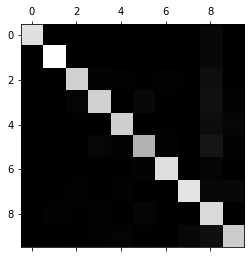

In [63]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [64]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

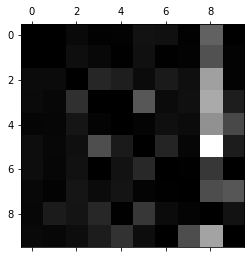

In [65]:
np.fill_diagonal(norm_conf_mx, 0) # fill diag with 0 only to keep error
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

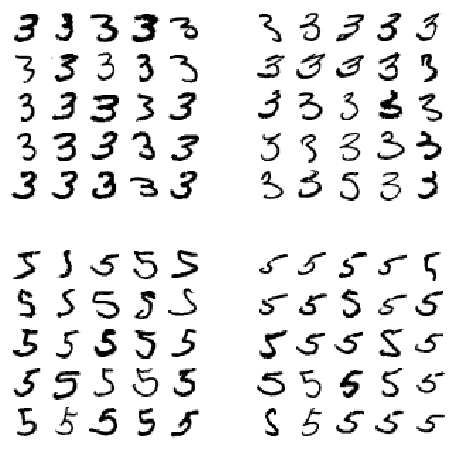

In [66]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
cl_a, cl_b = 3, 5
x_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]
x_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]
x_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
x_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(x_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(x_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(x_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(x_bb[:25], images_per_row=5)
plt.show()

## Multilabel Classifiers

In [68]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [69]:
knn_clf.predict(x_train[0].reshape(1,-1))

array([[False,  True]])

In [73]:
y_train_knn_pred = model_selection.cross_val_predict(knn_clf, x_train, y_multilabel, cv=3)
metrics.f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

## Multi-output Classifiers

In [74]:
noise = np.random.randint(0, 100, (len(x_train), 784))
x_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(x_test), 784))
x_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test

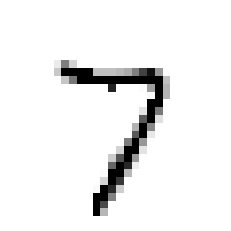

In [76]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

    knn_clf.fit(x_train_mod, y_train_mod)
clean_digit = knn_clf.predict([x_test_mod[0]])
plot_digit(clean_digit)